# HealtNotebook 



Welcome to HeathNotebook! <br> This is a notebook for health data analysis.
First we will ask you to enter your name and age and then we will ask more about your current health.
Depending on where you are running this notebook, when you run the next cell, you will be prompted to write your name and age.

In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

data = pd.read_csv("./covid19_dataset/covid_data_preprocessed.csv")



In [2]:
name_value = ""
age_value = 0
hours_slept_value = 0.0
sleep_quality_value = ""
stress_value = ""
exercise_value = ""
daily_steps_value = 0
alcohol_consumption_value = 0.0
food_value = ""



def labeled_widget(label, widget):
    return widgets.VBox([widgets.Label(label), widget], layout=widgets.Layout(align_items='stretch'))

name = widgets.Text(
    value='',
    placeholder='Type something',
    disabled=False)

age = widgets.IntText(
    value=0, 
    placeholder='Type something',
    disabled=False,
    min=0)

hours_slept = widgets.FloatText(
    value=0.0,
    placeholder='Type something',
    disabled=False,
    min=0.0,)

sleep_quality = widgets.Dropdown(
    options=["1: Yes, almost always", "2: Yes, often", "3: Rarely, or almost never"],
    value="1: Yes, almost always",
    disabled=False)

stress = widgets.Dropdown(
    options=["1", "2", "3", "4", "5", "6", "7"],
    value = "1",
    placeholder='1',
    disabled=False)

exercise = widgets.Dropdown(
    options=["Yes", "No"],
    value="Yes",
    disabled=False)

daily_steps = widgets.IntText(
    value=0, 
    placeholder=0,
    disabled=False,
    min=0)

alcohol_consumption = widgets.FloatText(
    value=0.0,
    placeholder=0.0,
    disabled=False,
    min=0.0,)

food = widgets.Dropdown(
    options=["1: Never" , "2: Yes, sometimes", "3: Often"],
    value="1: Never",
    disabled=False)


button = widgets.Button(description="Submit")

# Define a function to handle button click event
def on_button_click(b):
    global name_value, age_value, hours_slept_value, sleep_quality_value, \
    stress_value, exercise_value, daily_steps_value, alcohol_consumption_value, food_value

    name_value = name.value
    age_value = age.value
    hours_slept_value = hours_slept.value
    sleep_quality_value = int(sleep_quality.value.split(":")[0])
    stress_value = int(stress.value)
    exercise_value = 1 if exercise.value == "Yes" else 0
    daily_steps_value = daily_steps.value
    alcohol_consumption_value = int(alcohol_consumption.value)
    food_value = int(food.value.split(":")[0])


# Set the function to be called on button click
button.on_click(on_button_click)

# Create labeled widgets
name_labeled = labeled_widget('Name:', name)
age_labeled = labeled_widget('Age:', age)
hours_slept_labeled = labeled_widget('Hours slept on average:', hours_slept)
sleep_quality_labeled = labeled_widget('Do you feel tired:', sleep_quality)
stress_labeled = labeled_widget('Stress, on a scale from 1 to 7:', stress)  # Changed this line
exercise_labeled = labeled_widget('Is exercise part of your daily life:', exercise)  # Changed this line
daily_steps_labeled = labeled_widget('Daily steps:', daily_steps)  # Changed this line
alcohol_consumption_labeled = labeled_widget('Number of alcohol units:', alcohol_consumption)  # Changed this line
food_labeled = labeled_widget('When buying food, do you consider the healthiness of the food:', food)  # Changed this line


display(name_labeled, age_labeled, hours_slept_labeled, sleep_quality_labeled,
        stress_labeled, exercise_labeled, daily_steps_labeled,
        alcohol_consumption_labeled, food_labeled, button)


Button(description='Submit', style=ButtonStyle())

In [3]:
# print the values and the types of the global variables
print("name_value: ", name_value, type(name_value))
print("age_value: ", age_value, type(age_value))
print("hours_slept_value: ", hours_slept_value, type(hours_slept_value))
print("sleep_quality_value: ", sleep_quality_value, type(sleep_quality_value))
print("stress_value: ", stress_value, type(stress_value))
print("exercise_value: ", exercise_value, type(exercise_value))
print("daily_steps_value: ", daily_steps_value, type(daily_steps_value))
print("alcohol_consumption_value: ", alcohol_consumption_value, type(alcohol_consumption_value))
print("food_value: ", food_value, type(food_value))




name_value:  Heidi <class 'str'>
age_value:  36 <class 'int'>
hours_slept_value:  6.5 <class 'float'>
sleep_quality_value:  3 <class 'int'>
stress_value:  7 <class 'int'>
exercise_value:  1 <class 'int'>
daily_steps_value:  9993 <class 'int'>
alcohol_consumption_value:  0 <class 'int'>
food_value:  3 <class 'int'>


Helpful info: <br>
One alcohol unit is around 12g of pure alcohol. <br>


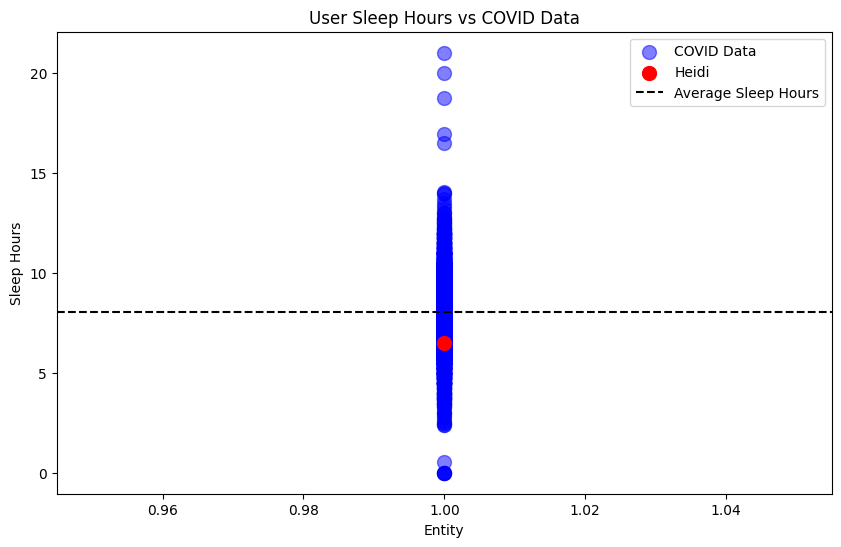

In [7]:
user_sleep_hours = hours_slept_value


# Create the plot
plt.figure(figsize=(10, 6))
# Plot the COVID data first

x_values = np.ones(len(data['sleeptime']))
plt.scatter(x_values, data['sleeptime'], color='blue', marker='o', s=100, alpha=0.5, label='COVID Data')

# Plot the user's sleep hours
# Use the same x-value as the COVID data to make the red dot appear within the blue dots
plt.scatter([1], [user_sleep_hours], color='red', marker='o', s=100, label=name_value)

# print average sleep hours as dotted line
plt.axhline(y=data['sleeptime'].mean(), color='black', linestyle='--', label='Average Sleep Hours')

# Add labels and title
plt.xlabel('Entity')
plt.ylabel('Sleep Hours')
plt.title('User Sleep Hours vs COVID Data')
plt.legend()

# Show the plot
plt.show()
